## Map of Lotsamples

### Sheet 2 color map data

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
import textwrap
from matplotlib.patches import Rectangle
# from matplotlib.colors import Normalize
import cv2

In [2]:
# Define the dimensions of the sheet and circle diameter in mm

# # Set default figure size
# plt.rcParams['figure.figsize'] = (18, 12)  # Adjust the figsize as needed

sheet_width_mm = 300  # 30 cm
sheet_height_mm = 100  # 10 cm
circle_diameter_mm = 15
spacing_mm=4

In [3]:
# Calculate the number of circles that can fit in each dimension
num_squares_x = 20
num_squares_y = 7

# Calculate the actual diameter of the circles including spacing
effective_circle_diameter_mm = circle_diameter_mm + spacing_mm

# Create a grid of zeros to represent the capacity values
circle_capacity = np.zeros((num_squares_y, num_squares_x))


In [4]:
# Calculate the total width and height of the grid
total_width_mm = num_squares_x * effective_circle_diameter_mm
total_height_mm = num_squares_y * effective_circle_diameter_mm


### Just a note:   the size of the figure, and the sizes of the dots are not connected.  Therefore if you change something (like the figure size) it could happen that all the dots would be misplaced and disproportionate.  While this is being worked on, please don't change the settings in the original notebook page.   Save a new page, and tinker with that.  This was a lot of work!!

<p align="center">
<img src = "https://wildlandtrekking.com/content/uploads/2022/05/venti-views-EOJDVJblvWw-unsplash-1200x901.jpg"
            width = "750"
            height = auto>
</p>

### if you see a picture, you are connected to the internet

Photograph map with grid.  <span style="color: #FF5733 ">Can skip if not needed</span>.

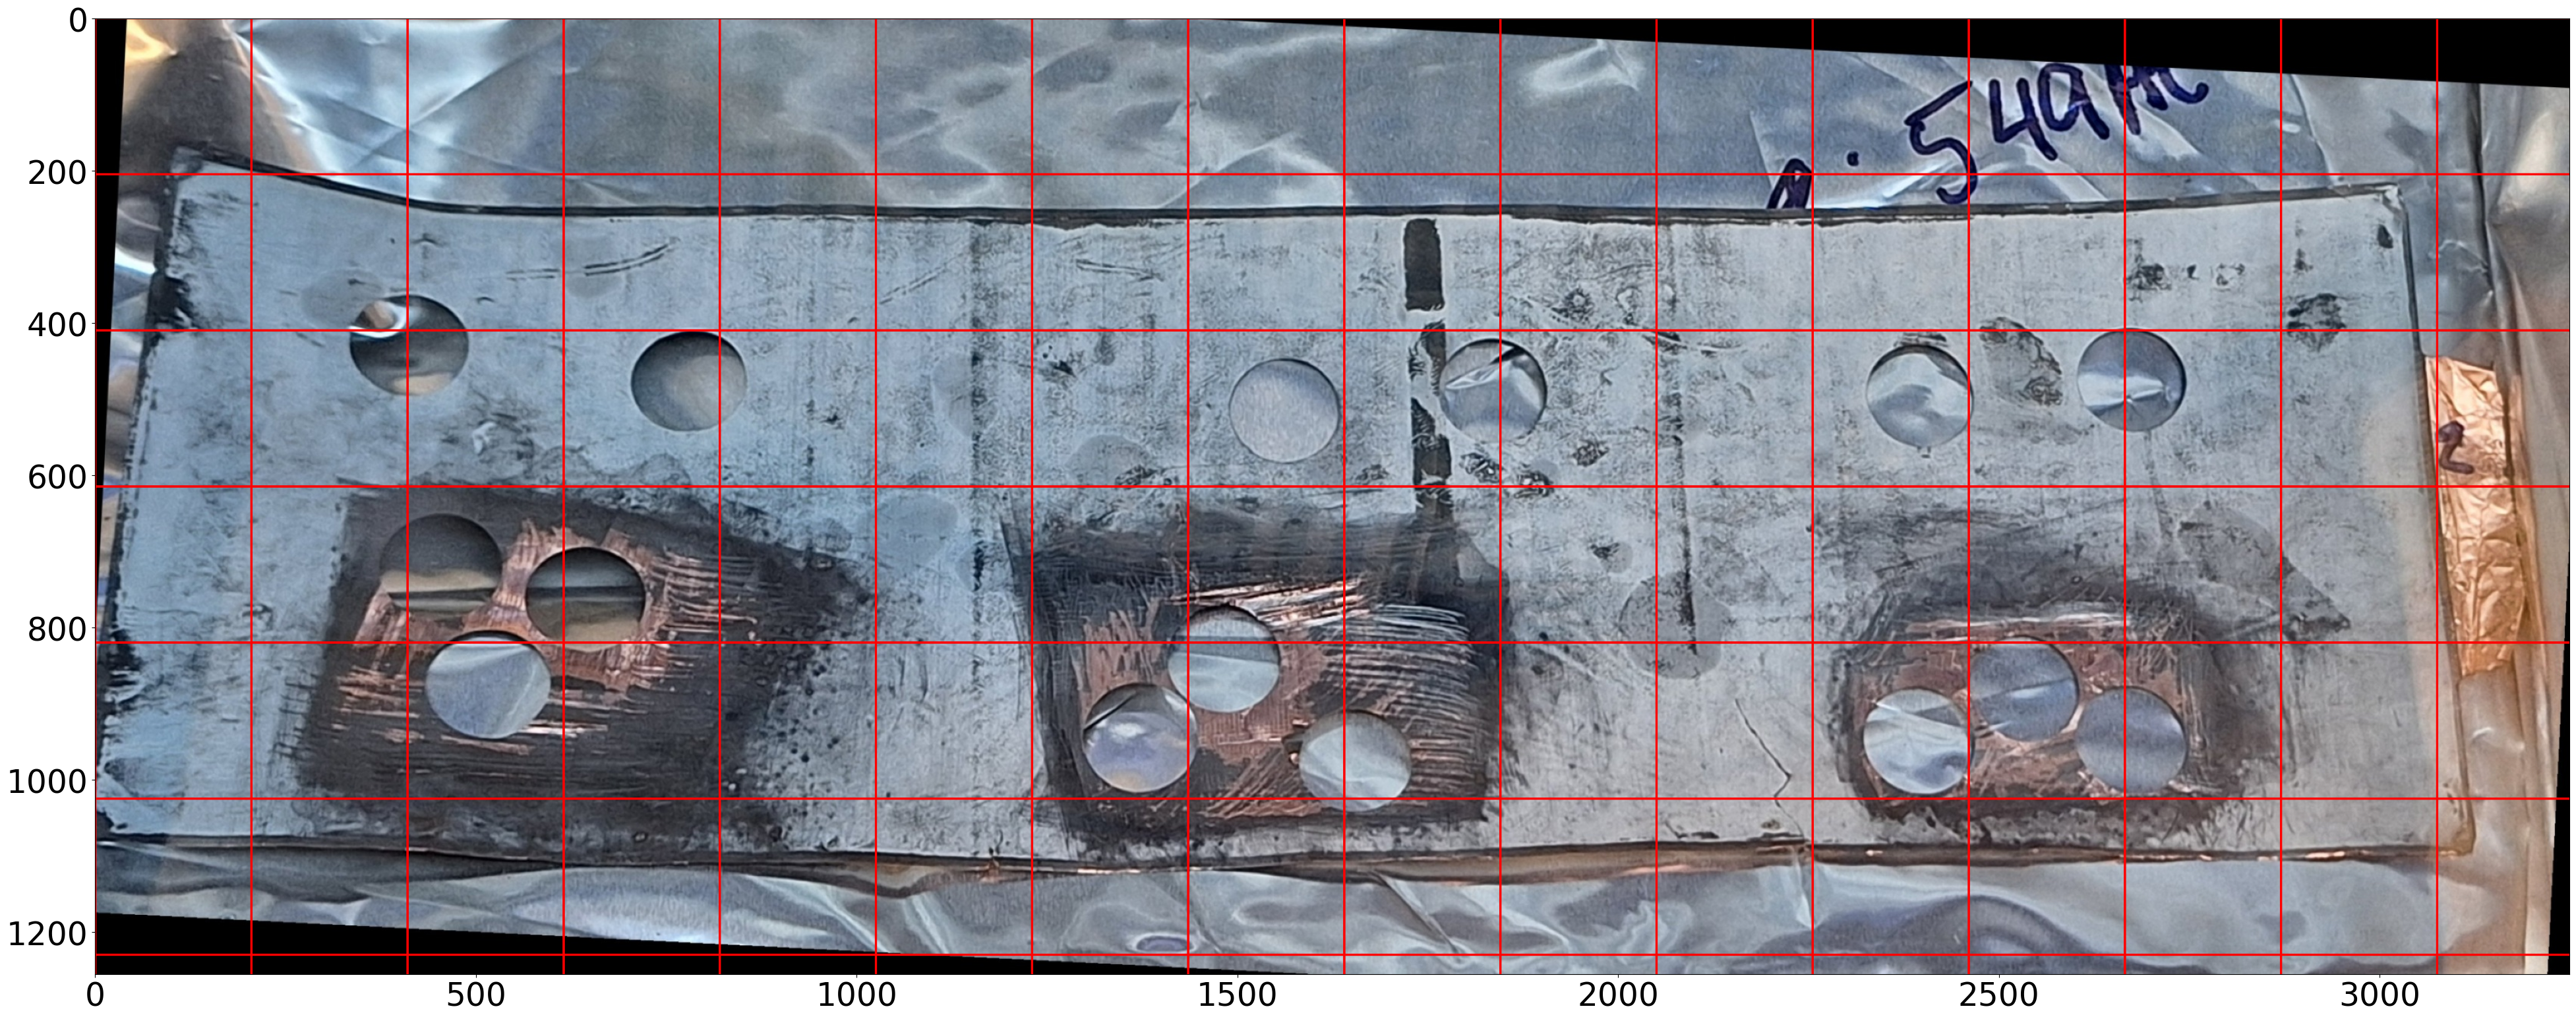

In [5]:
from IPython.display import Image, display

def display_image_with_grid_and_scale(image_path, grid_size=10, scale_length_cm=2, scale_bar_position_cm=(0, 0), figsize_multiplier=0.015):
    # Load the image
    image = cv2.imread(image_path)

    # Convert image to RGB (OpenCV uses BGR by default)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Get image dimensions
    height, width, _ = image_rgb.shape

    # Create a grid overlay
    for x in range(0, width, grid_size):
        cv2.line(image_rgb, (x, 0), (x, height), color=(255, 0, 0), thickness=2)

    for y in range(0, height, grid_size):
        cv2.line(image_rgb, (0, y), (width, y), color=(255, 0, 0), thickness=2)

    # Calculate proportional figsize
    figsize = (width * figsize_multiplier, height * figsize_multiplier)

    # Display the image with grid and scale bar
    plt.figure(figsize=figsize)
    plt.imshow(image_rgb)
    # plt.axis('on')  # Turn off axis labels
    plt.xticks(fontsize=35)                                                     # Set font size for X and Y axis labels
    plt.yticks(fontsize=35)
    # plt.yticks(fontsize=40)

    plt.show()

# Example: Display image with a grid overlay and a scale bar at a specified position.   The grid is based on pixels, I resize my image so that the electrode sheet is 3000 pixels long which aligns well with the 30cm length.

# image_path = r"C:\scripting\cellpy_data\notebooks\2nd_life\Lot_XXX\sample maps\XZXX(2)_map2.jpg"
image_path = r"C:\scripting\cellpy_data\notebooks\2nd_life\Lot_XXX\sample maps\XXX(2)_map.jpg"


display_image_with_grid_and_scale(image_path, 
                                  grid_size=205,                                # grid size is self explanatory
                                                                                #scale_length_cm=2,             # I couldn't get these to work
                                                                                #scale_bar_position_cm=(50, 50), 
)



In [6]:
sample_cell = 'Sample name'

In [7]:
# cv2.imwrite('path/to/save/image_with_grid.jpg', cv2.cvtColor(image_rgb, cv2.COLOR_RGB2BGR))

check if image file exists

In [8]:
# image_path = r"C:\scripting\cellpy_data\notebooks\lot_592\592A(26)backish.jpg"

# if os.path.exists(image_path):
#     print("File exists.")
# else:
#     print("File does not exist. Please check the path.")

### Cell parameters

In [20]:
# Define the coordinates and capacity values using a dictionary
#  Y values may be off, adding 5-7-5 (consistently) can account.   More lines can be added.
coordinates = {
    
    'Sample_01': (43,36),       # Manually enter coordiates for each circle/sample
    'Sample_02': (50, 21),      # dead cell
    'Sample_03': (63, 34),      # dead cell
    'Sample_04': (135, 17),
    'Sample_05': (146, 27),
    'Sample_06': (164, 12),
    'Sample_07': (236, 14),
    'Sample_08': (250, 22),
    'Sample_09': (265, 14)
}

capacities = {                               #   Manually enter cacity data.  This is used later for SOC and SOH.
    'Sample_01': (1.419464,1.498183),        #  (2nd cycle discharge, first cycle discharge)  These are manually entered from the data, unfortunately
    'Sample_02': (0, 0.146),                 #  The sample name is arbitrary.   I copied and pasted from my database of samples for redundancy.
    'Sample_03': (0, 2.44),
    'Sample_04': ( 2.643905,2.70399),
    'Sample_05': (2.575219,2.637802),
    'Sample_06': (2.58, 2.800609),
    'Sample_07': (1.994668, 1.703713),
    'Sample_08': (1.900509, 1.650338),
    'Sample_09': (2.706348, 2.738)
}

# Add SOC data to the dictionary
capacity_data = [(x, y, cap1) for (x, y), (cap1, _) in zip(coordinates.values(), capacities.values())]

# SOC = {k: (1-(v[0]/v[1])*100) if v[1] != 0 else 0 for k, v in capacities.items()}  This is for cathodes
SOC = {k: (100 - (v[0]/v[1])*100) if v[1] != 0 else 0 for k, v in capacities.items()}   # Likewise but for anodes


#  create SOH dictionary
full_SOH = 2.75/100             # JP3 is 2.75, the 100 is a fudge factor to make the color bar work in the map later.

SOH_values = {k: ((v[0]/full_SOH)) for k, v in capacities.items()}



# Now capacity_data contains tuples of (x, y, capacity)         # this is if you want to list the entered capacity data for some reason.
# print(capacity_data)


###  Enter capacity data here for each punch out

### <span style="color: #FF5733 ">non electrochemical samples</span>/planned samples

In [28]:
# Define the coordinates and capacity values for black circles
black_circle_data = [
    (30,70,"153μm"),              # The text is whatever you want to be inside the circle as a label.
    (62, 67,"XRD"),
    (134,66,"SEM"), 
    (158, 70,"XRD"),              # +5 more
    (217,69,"SEM"),
    (248,72,"XRD"),
    (50, 21,"fail"),              # blah blah 
    (63,34,"fail"),               # blah blah blah
    # (250,64,"63, 34"),            
    # (110,45,"new sample")
    # Add more black circles as needed
] 
  
#  missing sections.   The rectangles are placeholders for missing sections or whatever.
rectangle_data = [
  (145, 55, 8, 45),    # Example: x=10mm, y=10mm, width=50mm, height=30mm
  # (105, 0, 50, 50),    # Another rectangle 
  #  (200, 0, 45, 50),       
]

###  SOH color map.  Divide capacity by 100%  <span style="color:#088F8F"> SOH sample (2.75 for JP3)SOH sample (2.75 for JP3) </span>

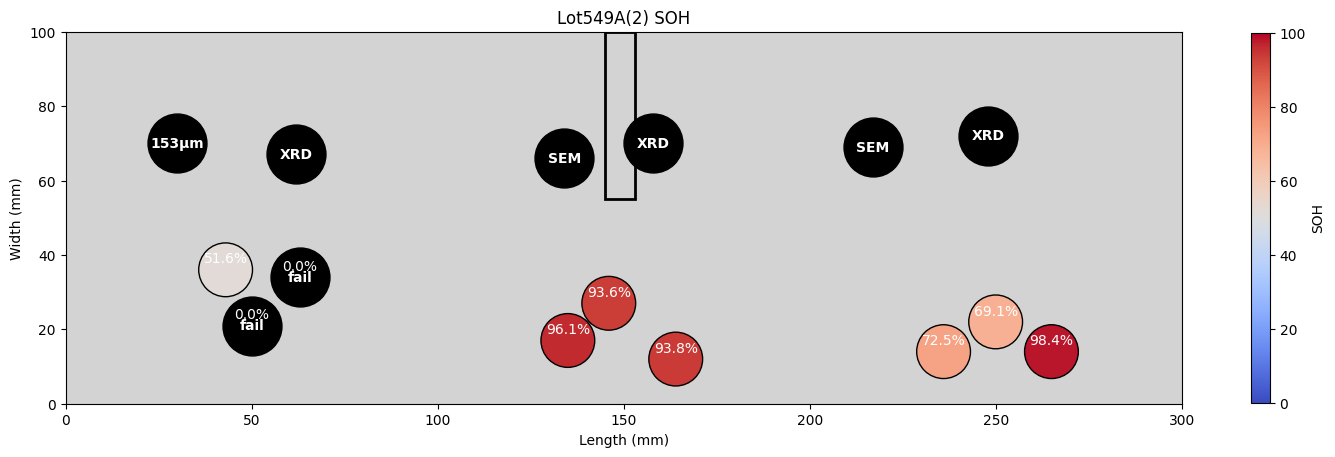

In [ ]:

# Set the solid color for the unplotted area
solid_color = 'lightgray'  # You can choose any valid color specification

# Create a background plot with the solid color
fig, ax = plt.subplots(figsize=(18, 12))

# Add a rectangle patch to create the solid color background
background_rect = Rectangle((0, 0), sheet_width_mm, sheet_height_mm, color=solid_color)
ax.add_patch(background_rect)



# Create a custom colormap that goes from blue (0 0%) to red ( 100%)
colormap = plt.get_cmap('coolwarm')
norm = Normalize(vmin=0, vmax=100)  # Set the color scale from 0 to 100

# Overlay the data on top of the solid color background
img = ax.imshow(square_capacity, cmap=colormap, extent=[0, sheet_width_mm, 0, sheet_height_mm], norm=norm)

# Add colorbar for the background plot
cbar = plt.colorbar(img, label='SOH', shrink=0.4, ax=ax)


# Assign values to variables
sample_coords = np.array([(x, y) for x, y in coordinates.values()])
sample_soh = np.array([v for v in SOH_values.values()])

# Plot samples on top of the existing plot
scatter = ax.scatter(
    sample_coords[:, 0], sample_coords[:, 1],
    c=sample_soh, cmap=colormap, edgecolors='k',
    s=1500,  # Adjust this value to match the 15mm diameter
    marker='o', norm=norm
)  


# Add text labels for each point
for i, (coord, value) in enumerate(zip(coordinates.keys(), SOH_values.values())):
    x, y = coordinates[coord]
    ax.annotate(f'{value:.1f}%', (x, y), textcoords="offset points", xytext=(0, 5), ha='center', color='white', fontsize=10)

# Plot black circles and add text labels with adjusted size
for i, (x, y, text) in enumerate(black_circle_data):
    circle_size = 1800  # Adjust the circle size as needed
    wrapped_text = textwrap.fill(text, width=6)
    ax.scatter(x, y, color='black', marker='o', s=circle_size)
    ax.annotate(
        wrapped_text, (x, y),
        color='white', va='center',
        fontsize=10, fontweight='bold',
        textcoords='offset points', xytext=(0, 0),
        ha='center'
    )
    
    
# Create rectangles to overlay
rectangles = [
    Rectangle((x, y), width, height, fill=False, edgecolor='black', linewidth=2)
    for x, y, width, height in rectangle_data
]

# Overlay the rectangles on top of the existing plot
for rect in rectangles:
    ax.add_patch(rect)

plt.title(sample_cell+' SOH')
plt.xlabel('Length (mm)')
plt.ylabel('Width (mm)')

plt.show()


###  Capacity color map

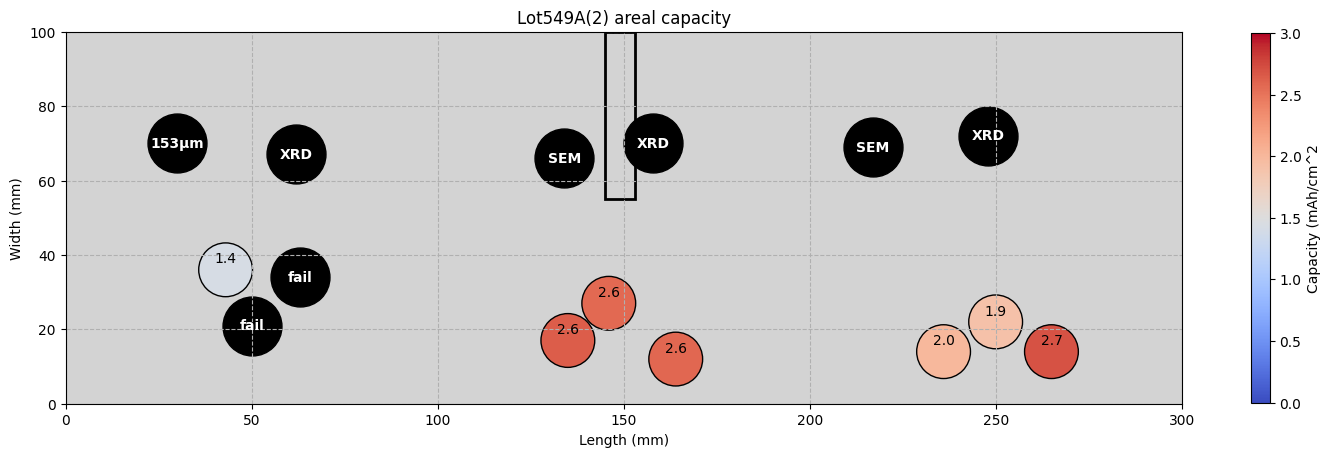

In [29]:
from matplotlib.patches import Rectangle
# from matplotlib.colors import Normalize

# Set the solid color for the unplotted area
solid_color = 'lightgray'  # You can choose any valid color specification

# Create a background plot with the solid color
fig, ax = plt.subplots(figsize=(18, 12))

# Add a rectangle patch to create the solid color background
background_rect = Rectangle((0, 0), sheet_width_mm, sheet_height_mm, color=solid_color)
ax.add_patch(background_rect)

# Generate random capacity values for each square (you can replace this with your actual data)
# # Assuming capacity values ranging from 0 to 3 mAh
square_capacity = np.random.uniform(0, 3, (num_squares_y, num_squares_x))

# Create a custom colormap that goes from blue (0 mAh) to red (3 mAh)
colormap = plt.get_cmap('coolwarm')
norm = Normalize(vmin=0, vmax=3)  # Set the color scale from 0 to 3 mAh

# Overlay the data on top of the solid color background
img = ax.imshow(square_capacity, cmap=colormap, extent=[0, sheet_width_mm, 0, sheet_height_mm], norm=norm)


# Assign values to variables
sample_coords = np.array([(x, y) for x, y, _ in capacity_data])
sample_capacity = np.array([c for _, _, c in capacity_data])

# Plot samples on top of the existing plot
scatter = ax.scatter(
    sample_coords[:, 0], sample_coords[:, 1],
    c=sample_capacity, cmap=colormap, edgecolors='k',
    s=1500,  # Adjust this value to match the 15mm diameter
    marker='o', norm=norm
)   
    
# Add text labels for each point
for i, (x, y, value) in enumerate(capacity_data):
    ax.annotate(f'{value:.1f}', (x, y), textcoords="offset points", xytext=(0, 5), ha='center', fontsize=10)
    
# Add gridlines
ax.grid(True, linestyle='--', alpha=1)

# Add colorbar for the background plot
cbar = plt.colorbar(img, label='Capacity (mAh/cm^2', shrink=0.4, ax=ax)

# Plot black circles and add text labels with adjusted size
for i, (x, y, text) in enumerate(black_circle_data):
    circle_size = 1800  # Adjust the circle size as needed
    wrapped_text = textwrap.fill(text, width=6)
    ax.scatter(x, y, color='black', marker='o', s=circle_size)
    ax.annotate(
        wrapped_text, (x, y),
        color='white', va='center',
        fontsize=10, fontweight='bold',
        textcoords='offset points', xytext=(0, 0),
        ha='center'
    )

# Create rectangles to overlay
rectangles = [
    Rectangle((x, y), width, height, fill=False, edgecolor='black', linewidth=2)
    for x, y, width, height in rectangle_data
]

# Overlay the rectangles on top of the existing plot
for rect in rectangles:
    ax.add_patch(rect)


    
plt.title(sample_cell+' areal capacity')
plt.xlabel('Length (mm)')
plt.ylabel('Width (mm)')

plt.show()




In [30]:
capacity_data

[(43, 36, 1.419464),
 (50, 21, 0),
 (63, 34, 0),
 (135, 17, 2.643905),
 (146, 27, 2.575219),
 (164, 12, 2.58),
 (236, 14, 1.994668),
 (250, 22, 1.900509),
 (265, 14, 2.706348)]

###  State of charge (SOC) color map

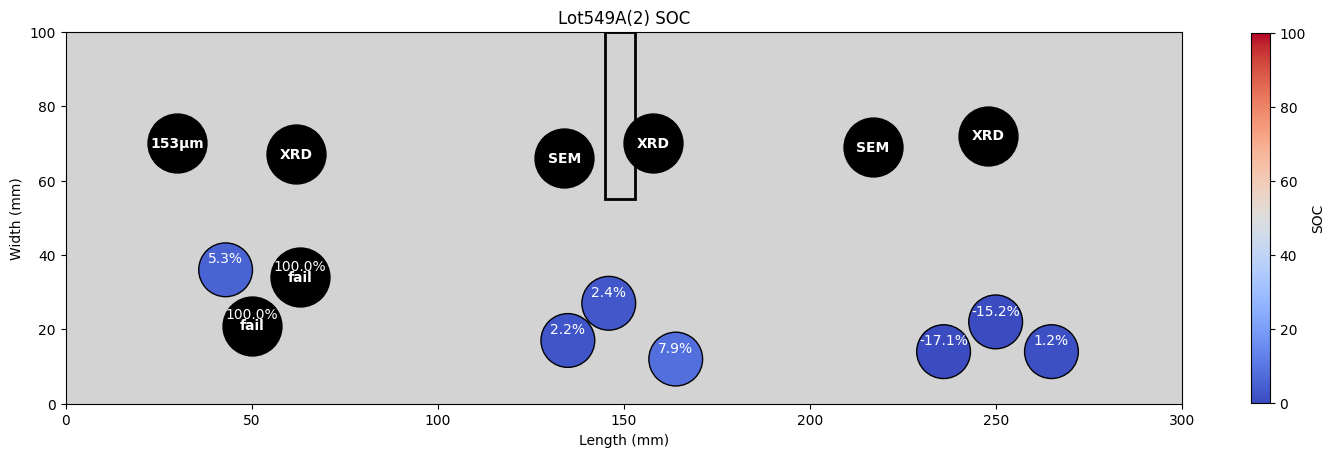

In [31]:
# Set the solid color for the unplotted area
solid_color = 'lightgray'                                                                                   # You can choose any valid color specification

fig, ax = plt.subplots(figsize=(18, 12))                                                                    # Create a background plot with the solid color

background_rect = Rectangle((0, 0), sheet_width_mm, sheet_height_mm, color=solid_color)                     # Add a rectangle patch to create the solid color background
ax.add_patch(background_rect)

square_capacity = np.random.uniform(0, 3, (num_squares_y, num_squares_x))                                   # Generate random capacity values for each square (you can replace this with your actual data)

colormap = plt.get_cmap('coolwarm')                                                                         # Create a custom colormap that goes from blue (0 mAh) to red (3 mAh)
norm = Normalize(vmin=0, vmax=100)                                                                          # Set the color scale from 0 to 3 mAh

img = ax.imshow(square_capacity, cmap=colormap, extent=[0, sheet_width_mm, 0, sheet_height_mm], norm=norm) # Overlay the data on top of the solid color background

# Add colorbar for the background plot
cbar = plt.colorbar(img, label='SOC', shrink=0.4, ax=ax)
                                                                                                             # Assign values to variables
sample_coords = np.array([(x, y) for x, y in coordinates.values()])
sample_capacity = np.array([v for v in SOC.values()])

                                                                                                             # Plot samples on top of the existing plot
scatter = ax.scatter(
    sample_coords[:, 0], sample_coords[:, 1],
    c=sample_capacity, cmap=colormap, edgecolors='k',
    s=1500,  # Adjust this value to match the 15mm diameter
    marker='o', norm=norm
)    

                                                                                                           # add text overlay to samples with percent
for i, (coord, value) in enumerate(zip(coordinates.keys(), SOC.values())):
    x, y = coordinates[coord]
    ax.annotate(f'{value:.1f}%', (x, y), textcoords="offset points", xytext=(0, 5), ha='center', color='white', fontsize=10)

# Plot black circles and add text labels with adjusted size
for i, (x, y, text) in enumerate(black_circle_data):
    circle_size = 1800  # Adjust the circle size as needed
    wrapped_text = textwrap.fill(text, width=6)
    ax.scatter(x, y, color='black', marker='o', s=circle_size)
    ax.annotate(
        wrapped_text, (x, y),
        color='white', va='center',
        fontsize=10, fontweight='bold',
        textcoords='offset points', xytext=(0, 0),
        ha='center'
    )
    

    
rectangles = [                                                                                              # Create rectangles to overlay
    Rectangle((x, y), width, height, fill=False, edgecolor='black', linewidth=2)
    for x, y, width, height in rectangle_data
]

for rect in rectangles:                                                                                     # Overlay the rectangles on top of the existing plot
    ax.add_patch(rect)

plt.title(sample_cell+' SOC')
plt.xlabel('Length (mm)')
plt.ylabel('Width (mm)')

plt.show()